In [1]:
# to do:
# add a repeatable block to get > 500 records if initial pull did not 
# enhance exceptions handling
# export printing of results into written log txt
# migrate unfound cities and status codes into separate df
# ISO Code Lookup on countries
# How to integrate state/province where appropriate?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
import requests
from datetime import datetime
from config import weather_api_key
import string

In [3]:
lats = np.random.uniform(low=-90, high=90, size=1500)
longs = np.random.uniform(low=-180, high=90, size=1500)
lat_longs = zip(lats, longs)
lat_longs

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [5]:
coordinates = list(lat_longs)
cities = list()

for coordinate in coordinates:
    city = citipy.nearest_city(latitude=coordinate[0], longitude=coordinate[1])
    if string.capwords(city.city_name) not in cities:
        cities.append(string.capwords(city.city_name)) # capitalizing all names since they came through in lowercase.  source https://favtutor.com/blogs/capitalize-first-letter-python
        
len(cities)

['Hermanus',
 'Cabo San Lucas',
 'Ushuaia',
 'Fez',
 'Hithadhoo',
 'Namwala',
 'Husavik',
 'Grindavik',
 'Kresttsy',
 'Manavalakurichi',
 'Port Hardy',
 'Tuktoyaktuk',
 'Aklavik',
 'Arraial Do Cabo',
 'Namibe',
 'Bay Roberts',
 'Puerto Ayora',
 'Zhanaozen',
 'Grand Gaube',
 'Vardo',
 'Tasiilaq',
 'Thompson',
 'Ilulissat',
 'Haftoni',
 'Amapa',
 'Rikitea',
 'Punta Arenas',
 'College',
 'Gobabis',
 'Beloha',
 'Upernavik',
 'Kahului',
 'Valparaiso',
 'Cabedelo',
 'Teguldet',
 'Narsaq',
 'Clyde River',
 'Eyl',
 'Mataura',
 'Arlit',
 'Price',
 'Kruisfontein',
 'Port-cartier',
 'Cape Town',
 'Petauke',
 'Illoqqortoormiut',
 'Sainte-anne-des-monts',
 'Busselton',
 'Xuddur',
 'Mindelo',
 'Caraquet',
 'Sao Joao Da Barra',
 'Tatvan',
 'Umzimvubu',
 'Sinnamary',
 'Santa Rosa',
 'Luderitz',
 'Ponta Do Sol',
 'Mahebourg',
 'Lompoc',
 'Kodiak',
 'Bambous Virieux',
 'Bethel',
 'Norman Wells',
 'Henties Bay',
 'Pisco',
 'San Patricio',
 'Oksfjord',
 'Quatre Cocos',
 'Mananjary',
 'Taolanaro',
 'Codrin

In [6]:
city_data = list()


print("Beginning Data Retrieval")
print("-------------------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count = 1
        # time.sleep(60) # delay execution for 60 seconds.  But why?
        
    city_url = base_url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    
    try:
        #extract the JSON data using API URL
        city_weather = requests.get(city_url).json()
        # print(city_url)
        # print(city_weather)
        
        #parse out data points
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert datetime to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #add to list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Long": city_long,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                           })
        
        print(f"{city} processed successfully.")
        
    except:
        #Change me later to print out the error!
        
        status_code = requests.get(city_url).status_code
        
        if status_code == 404:
            print(f"ERROR: City {city} not found.")
        else:
            print(f"ERROR: City {city} not processed. StatusCode: {status_code}")
        pass
    
print("-------------------------------------")
print("Data Retrieval Complete!")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of set 1 | Hermanus
Hermanus processed successfully.
Processing Record 2 of set 1 | Cabo San Lucas
Cabo San Lucas processed successfully.
Processing Record 3 of set 1 | Ushuaia
Ushuaia processed successfully.
Processing Record 4 of set 1 | Fez
Fez processed successfully.
Processing Record 5 of set 1 | Hithadhoo
Hithadhoo processed successfully.
Processing Record 6 of set 1 | Namwala
Namwala processed successfully.
Processing Record 7 of set 1 | Husavik
Husavik processed successfully.
Processing Record 8 of set 1 | Grindavik
Grindavik processed successfully.
Processing Record 9 of set 1 | Kresttsy
Kresttsy processed successfully.
Processing Record 10 of set 1 | Manavalakurichi
Manavalakurichi processed successfully.
Processing Record 11 of set 1 | Port Hardy
Port Hardy processed successfully.
Processing Record 12 of set 1 | Tuktoyaktuk
Tuktoyaktuk processed successfully.
Processing Record 13 of set 1 | Ak

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,64.90,89,14,7.52,ZA,2021-12-19 01:30:52
1,Cabo San Lucas,22.8909,-109.9124,73.71,78,20,3.44,MX,2021-12-19 01:36:56
2,Ushuaia,-54.8000,-68.3000,53.26,71,40,24.16,AR,2021-12-19 01:34:21
3,Fez,34.0372,-4.9998,48.31,70,0,5.75,MA,2021-12-19 01:37:28
4,Hithadhoo,-0.6000,73.0833,81.90,72,100,2.62,MV,2021-12-19 01:28:29
...,...,...,...,...,...,...,...,...,...
488,Iquitos,-3.7481,-73.2472,77.04,94,0,0.00,PE,2021-12-19 01:40:40
489,Ippy,6.2679,21.2247,72.28,42,100,3.51,CF,2021-12-19 01:40:41
490,Krasnyy Yar,46.5331,48.3456,35.53,83,100,13.82,RU,2021-12-19 01:40:41
491,Umm Lajj,25.0213,37.2685,65.07,59,2,12.66,SA,2021-12-19 01:40:31


In [10]:
column_order = ["City", "Country", "Date", "Lat", "Long", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-12-19 01:30:52,-34.4187,19.2345,64.90,89,14,7.52
1,Cabo San Lucas,MX,2021-12-19 01:36:56,22.8909,-109.9124,73.71,78,20,3.44
2,Ushuaia,AR,2021-12-19 01:34:21,-54.8000,-68.3000,53.26,71,40,24.16
3,Fez,MA,2021-12-19 01:37:28,34.0372,-4.9998,48.31,70,0,5.75
4,Hithadhoo,MV,2021-12-19 01:28:29,-0.6000,73.0833,81.90,72,100,2.62
...,...,...,...,...,...,...,...,...,...
488,Iquitos,PE,2021-12-19 01:40:40,-3.7481,-73.2472,77.04,94,0,0.00
489,Ippy,CF,2021-12-19 01:40:41,6.2679,21.2247,72.28,42,100,3.51
490,Krasnyy Yar,RU,2021-12-19 01:40:41,46.5331,48.3456,35.53,83,100,13.82
491,Umm Lajj,SA,2021-12-19 01:40:31,25.0213,37.2685,65.07,59,2,12.66


In [11]:
import os.path
output_data_file = os.path.join("weather_data", "cities.csv")
city_data_df.to_csv(output_data_file, index_label="City_ID")

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
27,College,US,2021-12-19 01:37:35,64.8569,-147.8028,12.15,82,90,3.44
31,Kahului,US,2021-12-19 01:25:28,20.8947,-156.4700,80.96,72,40,24.16
40,Price,US,2021-12-19 01:33:50,39.5994,-110.8107,27.12,68,1,0.00
57,Lompoc,US,2021-12-19 01:37:46,34.6391,-120.4579,56.57,77,1,5.75
58,Kodiak,US,2021-12-19 01:27:13,57.7900,-152.4072,32.23,76,91,10.45
...,...,...,...,...,...,...,...,...,...
454,Nome,US,2021-12-19 01:40:27,64.5011,-165.4064,15.87,86,90,6.91
464,Merrill,US,2021-12-19 01:40:31,45.1805,-89.6835,24.57,85,1,0.00
481,Morgan City,US,2021-12-19 01:40:38,29.6994,-91.2068,66.20,94,90,12.66
483,Springdale,US,2021-12-19 01:40:39,36.1867,-94.1288,37.13,84,90,11.01


## Plotting climate charts

In [20]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

today = datetime.utcfromtimestamp(time.time()).strftime("%x")

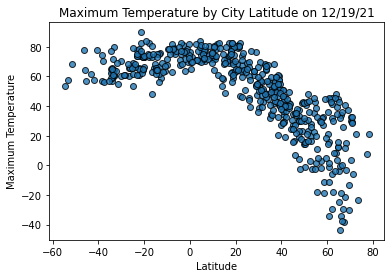

In [28]:
plt.scatter(x = lats,
            y = max_temps,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Maximum Temperature by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.savefig("weather_data/Fig1.png")

plt.show()

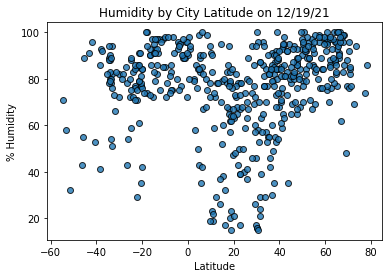

In [31]:
plt.scatter(x = lats,
            y = humidity,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Humidity by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")

plt.savefig("weather_data/Fig2.png")

plt.show()

In [ ]:
plt.scatter(x = lats,
            y = humidity,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Humidity by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("% ")

plt.savefig("weather_data/Fig2.png")

plt.show()